In [1]:
import sys
sys.path.append("../lib")

In [2]:
import matplotlib.pyplot as plt
from algorithms.horner_method import horner_method
from algorithms.square_matrix_multiply import square_matrix_multiply
from algorithms.gauss_algorithm import gauss_algorithm
from analyzer import generate_horner_test_case, generate_square_matrix_test_case, generate_matrix_test_case

In [3]:
n_test_case = 5

algorithms_test_cases = {
    'horner_method': { 'test': generate_horner_test_case(n_test_case), 'algo': horner_method, 'complexity': 'n' }, 
    'gauss_algorithm': { 'test': generate_matrix_test_case(n_test_case), 'algo': gauss_algorithm, 'complexity': 'n^3' }, 
    'square_matrix_multiply': { 'test': generate_square_matrix_test_case(n_test_case), 'algo': square_matrix_multiply, 'complexity': 'n^3' }, 
}

In [4]:
for algo in algorithms_test_cases:
    for test_case in algorithms_test_cases[algo]['test']['test_case']:
        test_case[0].read_counter = 0
        if algo=="gauss_algorithm":
            algorithms_test_cases[algo]['algo'](test_case[0])
        else:
            algorithms_test_cases[algo]['algo'](test_case[0], test_case[1])


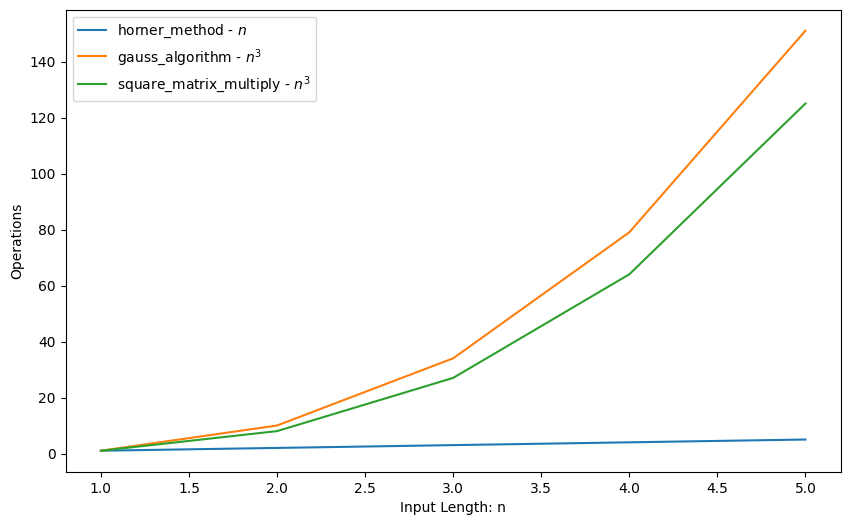

In [5]:
plt.figure(figsize=(10, 6))
plt.ylabel('Operations')
plt.xlabel('Input Length: n')

for algo in algorithms_test_cases:
    plt.plot(
        [ i for i in algorithms_test_cases[algo]['test']['length']], 
        [ test_case[0].read_counter for test_case in algorithms_test_cases[algo]['test']['test_case'] ],
        label=r'{0} -{1}'.format(algo, r'$\ {0}$'.format(algorithms_test_cases[algo]['complexity']))
    )

plt.legend()
plt.savefig('source/algebra_complexity.png')
plt.show()